**Import the following playlists from the Spotify API:**

-Global Top 50

-USA Top 50

-Canada Top 50

-Australia Top 50

-Ireland Top 50

-UK Top 50

In [5]:
#import the necessary libraries
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#add the playlists from the stored Data file
globalTop = pd.read_csv(r'C:\\Users\\Jessica\\Spot50-Data-Analysis\\Data\\Global-Top-50.csv', 
                        sep = ',', error_bad_lines = False, index_col = False)
usaTop = pd.read_csv(r'C:\\Users\\Jessica\\Spot50-Data-Analysis\\Data\\USA-Top-50.csv', 
                     sep = ',', error_bad_lines = False, index_col = False)
australiaTop = pd.read_csv(r'C:\\Users\\Jessica\\Spot50-Data-Analysis\\Data\\Australia-Top-50.csv', 
                           sep = ',', error_bad_lines = False, index_col = False)
canadaTop = pd.read_csv(r'C:\\Users\\Jessica\\Spot50-Data-Analysis\\Data\\Canada-Top-50.csv', 
                        sep = ',', error_bad_lines = False, index_col = False)
irelandTop = pd.read_csv(r'C:\\Users\\Jessica\\Spot50-Data-Analysis\\Data\\Ireland-Top-50.csv', 
                         sep = ',', error_bad_lines = False, index_col = False)
ukTop = pd.read_csv(r'C:\\Users\\Jessica\\Spot50-Data-Analysis\\Data\\UK-Top-50.csv', 
                    sep = ',', error_bad_lines = False, index_col = False)

In [10]:
#combine the dataframes into one dataframe
allTracks_df = pd.concat([globalTop,usaTop]).drop_duplicates().reset_index(drop=True)
allTracks_df = pd.concat([allTracks_df,australiaTop]).drop_duplicates().reset_index(drop=True)
allTracks_df = pd.concat([allTracks_df,canadaTop]).drop_duplicates().reset_index(drop=True)
allTracks_df = pd.concat([allTracks_df,irelandTop]).drop_duplicates().reset_index(drop=True)
allTracks_df = pd.concat([allTracks_df,ukTop]).drop_duplicates().reset_index(drop=True)
allTracks_df.head()

,Name,Album,Artist,Release Date,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time Signature
0,STAY (with Justin Bieber),F*CK LOVE 3: OVER YOU,The Kid LAROI,2021-07-23,141805,92,0.03830,0.591,0.764,0.000000,0.1030,-5.484,0.0483,169.928,4
1,INDUSTRY BABY (feat. Jack Harlow),MONTERO,Lil Nas X,2021-09-17,212352,82,0.02210,0.741,0.691,0.000000,0.0476,-7.395,0.0672,150.087,4
2,THATS WHAT I WANT,MONTERO,Lil Nas X,2021-09-17,143901,89,0.00614,0.737,0.846,0.000000,0.0486,-4.510,0.2200,87.981,4
3,Heat Waves,Dreamland (+ Bonus Levels),Glass Animals,2020-08-06,238805,88,0.44000,0.761,0.525,0.000007,0.0921,-6.900,0.0944,80.870,4
4,Bad Habits,Bad Habits,Ed Sheeran,2021-06-25,231041,97,0.04690,0.808,0.897,0.000031,0.3640,-3.712,0.0348,126.026,4


In [11]:
#Add columns to indicate if a track was listed in each of the playlists
allTracks_df['Global'] = allTracks_df['Name'].isin(globalTop['Name'].tolist()).astype(int)
allTracks_df['USA'] = allTracks_df['Name'].isin(usaTop['Name'].tolist()).astype(int)
allTracks_df['Australia'] = allTracks_df['Name'].isin(australiaTop['Name'].tolist()).astype(int)
allTracks_df['Canada'] = allTracks_df['Name'].isin(canadaTop['Name'].tolist()).astype(int)
allTracks_df['Ireland'] = allTracks_df['Name'].isin(irelandTop['Name'].tolist()).astype(int)
allTracks_df['UK'] = allTracks_df['Name'].isin(ukTop['Name'].tolist()).astype(int)
allTracks_df.head()

,Name,Album,Artist,Release Date,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,...,Loudness,Speechiness,Tempo,Time Signature,Global,USA,Australia,Canada,Ireland,UK
0,STAY (with Justin Bieber),F*CK LOVE 3: OVER YOU,The Kid LAROI,2021-07-23,141805,92,0.03830,0.591,0.764,0.000000,...,-5.484,0.0483,169.928,4,1,1,1,1,1,1
1,INDUSTRY BABY (feat. Jack Harlow),MONTERO,Lil Nas X,2021-09-17,212352,82,0.02210,0.741,0.691,0.000000,...,-7.395,0.0672,150.087,4,1,1,1,1,1,1
2,THATS WHAT I WANT,MONTERO,Lil Nas X,2021-09-17,143901,89,0.00614,0.737,0.846,0.000000,...,-4.510,0.2200,87.981,4,1,1,1,1,1,1
3,Heat Waves,Dreamland (+ Bonus Levels),Glass Animals,2020-08-06,238805,88,0.44000,0.761,0.525,0.000007,...,-6.900,0.0944,80.870,4,1,1,1,1,1,1
4,Bad Habits,Bad Habits,Ed Sheeran,2021-06-25,231041,97,0.04690,0.808,0.897,0.000031,...,-3.712,0.0348,126.026,4,1,1,1,1,1,1


<AxesSubplot:>

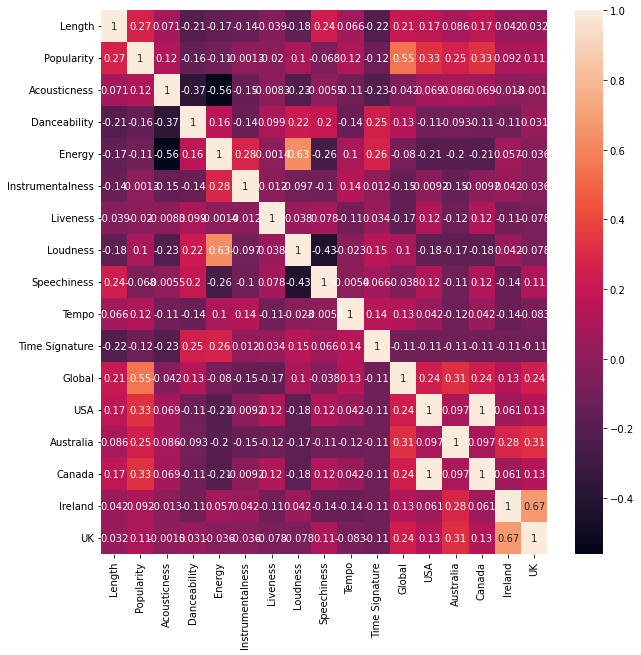

In [12]:
#heatmap to see if there are any obvious trends to explore
corr = allTracks_df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, annot=True, ax=ax)

In [13]:
allTracks_df.describe()

,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time Signature,Global,USA,Australia,Canada,Ireland,UK
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,193120.419643,82.732143,0.211210,0.691223,0.661634,0.014072,0.166068,-5.849009,0.112715,123.599545,3.991071,0.446429,0.446429,0.446429,0.446429,0.446429,0.446429
std,45656.089841,9.279428,0.229762,0.138874,0.157744,0.083782,0.106977,1.837927,0.111764,28.476421,0.094491,0.499356,0.499356,0.499356,0.499356,0.499356,0.499356
min,108650.000000,39.000000,0.000038,0.319000,0.225000,0.000000,0.037400,-12.490000,0.025800,75.503000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161596.000000,78.000000,0.025925,0.609750,0.535750,0.000000,0.100625,-6.862750,0.040600,100.455000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,182222.500000,84.500000,0.126000,0.715500,0.686000,0.000000,0.120500,-5.713500,0.066700,124.063500,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,218105.000000,89.000000,0.311500,0.782500,0.781250,0.000032,0.215500,-4.524250,0.142250,143.018500,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,339249.000000,97.000000,0.898000,0.961000,0.989000,0.633000,0.629000,-2.724000,0.723000,180.917000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
globalTop.describe()

,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time Signature
count,50.000000,50.000000,50.000000,50.00000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.00000,50.000000
mean,203550.220000,88.340000,0.200557,0.71160,0.647700,2.398188e-04,0.146326,-5.637820,0.108048,127.72128,3.980000
std,45145.423723,5.419579,0.216347,0.12855,0.150595,6.779193e-04,0.096558,1.746041,0.080696,31.48674,0.141421
min,123986.000000,75.000000,0.000619,0.33200,0.225000,0.000000e+00,0.042400,-9.579000,0.028400,79.98200,3.000000
25%,166685.250000,84.500000,0.027450,0.65225,0.528500,0.000000e+00,0.092225,-6.686000,0.049125,102.03575,4.000000
50%,207281.500000,90.000000,0.107500,0.74200,0.659500,7.700000e-07,0.113000,-5.616000,0.080700,128.98150,4.000000
75%,230812.000000,92.000000,0.312250,0.78600,0.764000,8.435000e-05,0.140250,-3.981000,0.148250,150.07975,4.000000
max,298899.000000,97.000000,0.768000,0.92400,0.897000,3.490000e-03,0.420000,-2.724000,0.330000,180.91700,4.000000
